In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/tlok-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/tlok-labels-idx1-ubyte.gz

--2020-09-27 09:14:10--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.90
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.90|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz.4’

train-images-idx3-u 100%[===================>]  25.20M  16.6MB/s    in 1.5s    

2020-09-27 09:14:12 (16.6 MB/s) - ‘train-images-idx3-ubyte.gz.4’ saved [26421880/26421880]

--2020-09-27 09:14:12--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.47.118
Connecting to fashion-mnist.s3-website.eu-central-1.am

In [ ]:
!mkdr MNIST_Fashion
!cp *.gz MNIST_Fashion/
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_Fashion/",one_hot=True)

/bin/bash: mkdr: command not found
Extracting MNIST_Fashion/train-images-idx3-ubyte.gz
Extracting MNIST_Fashion/train-labels-idx1-ubyte.gz
Extracting MNIST_Fashion/t10k-images-idx3-ubyte.gz
Extracting MNIST_Fashion/t10k-labels-idx1-ubyte.gz


In [ ]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)
print(mnist.train.labels.shape)
print(mnist.test.labels.shape)

(55000, 784)
(10000, 784)
(55000, 10)
(10000, 10)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00784314 0.54509807 0.48627454
 0.         0.         0.         0.         0.         0.
 0.         0.16078432 0.6666667  0.43921572 0.         0.
 0.00392157 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.18823531 0.85098046 0.8941177  0.87843144 0.8705883  0.37254903
 0.03921569 0.02352941 0.0509804  0.2392157  0.6745098  0.85098046
 0.8745099  0.82745105 0.         0.         0.00392157 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00784314 0.         0.         0.82745105 0.90196085
 0.8313726  0.8196079  0.854902   1.         1.         1.
 1.         1.         0.87843144 0.8235295  0.81568635 0.8431373
 0.04705883 0.         0.01176471 0.         0.         0.
 0.         0.         0.         0.         0.         0.01568628
 0.         0.3254902  0.94117653 0.86274517 0.86666673 0.8352942
 0

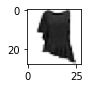

In [ ]:
plt.figure(figsize=(1,1))
sample_image=mnist.train.next_batch(1)[0]
print(sample_image[0])
sample_image=sample_image.reshape([28,28])
plt.imshow(sample_image,cmap="Greys")

In [ ]:
learning_rate=0.0002
batch_size=128
epochs=10000
image_dim=784
Y_dimension=10
gen_hidd_dim=256
disc_hidd_dim=256
z_noise_dim=100
def xavier_init(shape):
  return tf.random_normal(shape=shape,stddev=1./tf.sqrt(shape[0]/2.0))

In [ ]:
weights={"disc_H":tf.Variable(xavier_init([image_dim,disc_hidd_dim])),
         "disc_final":tf.Variable(xavier_init([disc_hidd_dim,1])),
         "gen_H":tf.Variable(xavier_init([z_noise_dim,gen_hidd_dim])),
         "gen_final":tf.Variable(xavier_init([gen_hidd_dim,image_dim]))
        }
bias={"disc_H":tf.Variable(xavier_init([disc_hidd_dim])),
      "disc_final":tf.Variable(xavier_init([1])),
      "gen_H":tf.Variable(xavier_init([gen_hidd_dim])),
      "gen_final":tf.Variable(xavier_init([image_dim]))
       }

In [ ]:
def Discriminator(x):
  hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,weights["disc_H"]),bias["disc_H"]))
  final_layer=tf.add(tf.matmul(hidden_layer,weights["disc_final"]),bias["disc_final"])
  disc_output=tf.nn.sigmoid(final_layer)
  return final_layer,disc_output

In [ ]:
def Generator(x):
  hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,weights['gen_H']),bias["gen_H"]))
  final_layer=tf.add(tf.matmul(hidden_layer,weights["gen_final"]),bias["gen_final"])
  gen_output=tf.nn.sigmoid(final_layer)
  return gen_output

In [ ]:
z_input=tf.placeholder(tf.float32,shape=[None,z_noise_dim],name="input_noise")
x_input=tf.placeholder(tf.float32,shape=[None,image_dim],name="real_input")
with tf.name_scope("Generator") as scope:
  output_Gen=Generator(z_input)
with tf.name_scope("Discriminator") as scope:
  real_output_Disc,real_output_Disc=Discriminator(x_input)
  fake_output_Disc,fake_output_Disc=Discriminator(output_Gen)  

In [ ]:
with tf.name_scope("Discrminator_Loss") as scope:
  Discriminator_Loss=-tf.reduce_mean(tf.log(real_output_Disc+0.0001)+tf.log(1.-fake_output_Disc+0.0001))
with tf.name_scope("Generator_Loss") as scope:
  Generator_Loss=-tf.reduce_mean(tf.log(fake_output_Disc+0.0001))
Disc_loss_total=tf.summary.scalar("Disc_Total_loss",Discriminator_Loss)
Gen_loss_total=tf.summary.scalar("Gen_Loss",Generator_Loss)   

In [ ]:
with tf.name_scope("Discriminator_Loss") as scope:
  Disc_real_Loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_output_Disc,labels=tf.ones_like(real_output_Disc)))
  Disc_fake_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_output_Disc,labels=tf.zeros_like(fake_output_Disc)))
with tf.name_scope("Generator") as scope:
  Generator_Loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_output_Disc,labels=tf.ones_like(fake_output_Disc)))

In [ ]:
Disc_loss_real_summary=tf.summary.scalar("Disc_loss_real",Disc_real_Loss)
Disc_loss_fake_summary=tf.summary.scalar("Disc_loss_fake",Disc_fake_loss)
Disc_loss_summary=tf.summary.scalar("Disc_Total_loss",Discriminator_Loss)

Disc_loss_total=tf.summary.merge([Disc_loss_real_summary,Disc_loss_summary])
Gen_loss_total=tf.summary.scalar("Gen_Loss",Generator_Loss)

In [ ]:
Generator_var=[weights["gen_H"],weights["gen_final"],bias["gen_H"],bias["gen_final"]]
Discriminator_var=[weights["disc_H"],weights["disc_final"],bias["disc_H"],bias["disc_final"]]

In [ ]:
with tf.name_scope("Optimizer_Discriminator") as scope:
  Discriminator_optimize=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(Discriminator_Loss,var_list=Discriminator_var)
with tf.name_scope("Optmizer_Generator") as scope:
  Generator_optimize=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(Generator_Loss,var_list=Generator_var) 

In [ ]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
writer=tf.summary.FileWriter("./log",sess.graph)

for epoch in range(epochs):
  x_batch,_=mnist.train.next_batch(batch_size)
  z_noise=np.random.uniform(-1.,1.,size=[batch_size,z_noise_dim])
  _,Disc_loss_epoch=sess.run([Discriminator_optimize,Discriminator_Loss],feed_dict={x_input:x_batch,z_input:z_noise})
  _,Gen_loss_epoch=sess.run([Generator_optimize,Generator_Loss],feed_dict={x_input:x_batch,z_input:z_noise})
  summary_Disc_Loss=sess.run(Disc_loss_total,feed_dict={x_input:x_batch,z_input:z_noise})
  writer.add_summary(summary_Disc_Loss,epoch)
  summary_Gen_Loss=sess.run(Gen_loss_total,feed_dict={z_input:z_noise})
  writer.add_summary(summary_Gen_Loss,epoch)
  if epoch % 2000==0:
    print("scope:{0},  Generator Loss:{1},  Discriminator Loss:{2}".format(epoch,Gen_loss_epoch,Disc_loss_epoch))


scope:0,  Generator Loss:0.39364033937454224,  Discriminator Loss:2.1563169956207275
scope:2000,  Generator Loss:0.6532579660415649,  Discriminator Loss:0.22015485167503357
scope:4000,  Generator Loss:0.6693666577339172,  Discriminator Loss:0.1114438995718956
scope:6000,  Generator Loss:0.6701176166534424,  Discriminator Loss:0.19540342688560486
scope:8000,  Generator Loss:0.6693599224090576,  Discriminator Loss:0.3009392321109772


<function matplotlib.pyplot.show>

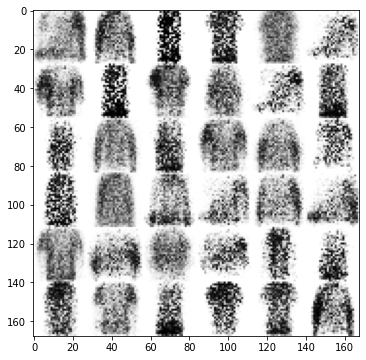

In [ ]:
n=6
canvas=np.empty((28*n,28*n))
for i in range(n):
  z_noise=np.random.uniform(-1.,1.,size=[batch_size,z_noise_dim])
  g=sess.run(output_Gen,feed_dict={z_input:z_noise})
  g=-1*(g-1)
  for j in range(n):
    canvas[i*28:(i+1)*28,j*28:(j+1)*28]=g[j].reshape([28,28])
plt.figure(figsize=(n,n))
plt.imshow(canvas,origin="upper",cmap="gray")
plt.show    